# 5) Predicting Red and White wine - Deep Learning (Artificial Neural Network)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import operator
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print(red.info())

print('-------------------------')

print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar

In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

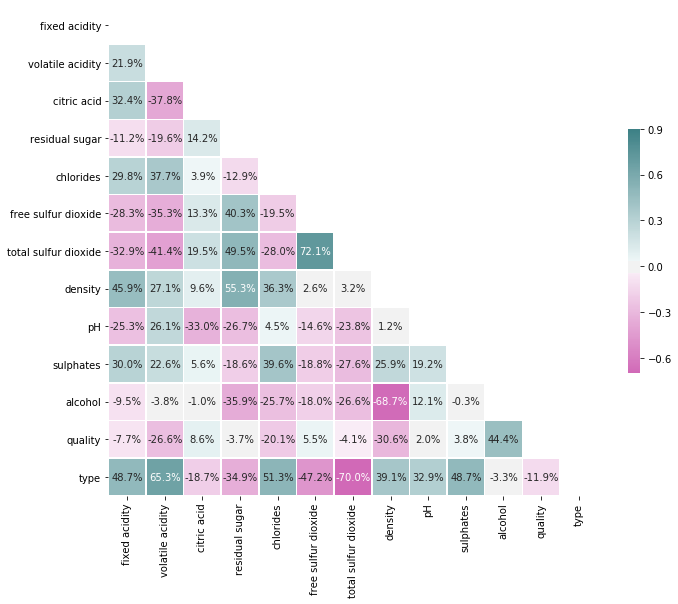

In [11]:
#Visualize correlation via heatmap
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
corr = wines.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, 
            fmt='.1%',
            mask=mask,
            cmap=cmap,
            vmax=.9,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [12]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [14]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0919 21:33:57.337422 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 21:33:57.363371 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 21:33:57.368341 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

W0919 21:33:57.444134 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0919 21:33:57.450119 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.49040928, -0.3110742 , -0.05596709, -0.30298907, -0.4140191 ,
         -0.27162588,  0.28635228,  0.25661355,  0.49680454,  0.07972336,
         -0.25986698,  0.40823072],
        [-0.38782653,  0.06110895, -0.2310082 , -0.2707613 , -0.39355427,
          0.06017667,  0.4174273 ,  0.03990239, -0.09205154,  0.47525024,
         -0.02874044, -0.4656613 ],
        [-0.4096741 , -0.28579313,  0.08762836, -0.08124661,  0.49860758,
          0.46760052, -0.34803787,  0.31147242,  0.39679646,  0.1385631 ,
         -0.02445573,  0.31197494],
        [-0.32708603,  0.16635853, -0.10977978,  0.27605575, -0.39572084,
         -0.3410398 , -0.19298524, -0.33356366, -0.21471483,  0.13008195,
          0.462606  , -0.10762367],
        [-0.1303921 ,  0.02151173,  0.16771704, -0.0554738 , -0.33521914,
          0.13646615, -0.15269011,  0.38870233, -0.04535615, -0.16111535,
          0.02516359,  0.29745084],
        [ 0.39062148,  0.5050718 , -0.39454708,  0.48386663, -0.46703234,
      

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=1)

W0919 21:33:57.570795 18276 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 21:33:57.622663 18276 deprecation.py:323] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0599 - acc: 0.9854
Epoch 2/100
5197/5197 [==============================] - 8s 2ms/step - loss: 0.0253 - acc: 0.9938
Epoch 3/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0202 - acc: 0.9962
Epoch 4/100
5197/5197 [==============================] - 6s 1ms/step - loss: 0.0191 - acc: 0.9963
Epoch 5/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0171 - acc: 0.9971
Epoch 6/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0162 - acc: 0.9971
Epoch 7/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0163 - acc: 0.9969
Epoch 8/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0157 - acc: 0.9973
Epoch 9/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0147 - acc: 0.9963
Epoch 10/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0145 - acc: 0.9969
Epoch 11/100
5197/5

5197/5197 [==============================] - 7s 1ms/step - loss: 0.0070 - acc: 0.9983
Epoch 84/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0043 - acc: 0.9987
Epoch 85/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0039 - acc: 0.9987
Epoch 86/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0035 - acc: 0.9988
Epoch 87/100
5197/5197 [==============================] - 9s 2ms/step - loss: 0.0044 - acc: 0.9987
Epoch 88/100
5197/5197 [==============================] - 10s 2ms/step - loss: 0.0055 - acc: 0.9987
Epoch 89/100
5197/5197 [==============================] - 10s 2ms/step - loss: 0.0044 - acc: 0.9990
Epoch 90/100
5197/5197 [==============================] - 10s 2ms/step - loss: 0.0035 - acc: 0.9987
Epoch 91/100
5197/5197 [==============================] - 10s 2ms/step - loss: 0.0041 - acc: 0.9988
Epoch 92/100
5197/5197 [==============================] - 10s 2ms/step - loss: 0.0052 - acc: 0.9981
Epoch 93/100
5197/

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [19]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

1300/1300 [==============================] - 0s 85us/step
[0.06001970744848502, 0.9938461538461538]


In [20]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
#defining confusion matrix plotting function
#sourced from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using 0 and 1 for White and Red wines respectively 
class_names = ['White','Red']

[[955   4]
 [  4 337]]
Keras Precision is 0.99


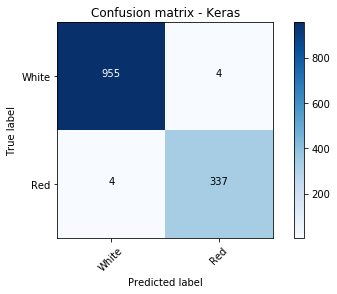

In [22]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
  
print(cm)
print("Keras Precision is %2.2f" % precision_score(y_test, y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix - Keras')
plt.show;

In [23]:
#precision_score(y_test, y_pred)

In [24]:
recall_score(y_test, y_pred)

0.9882697947214076

## Conclusions:

Keras contains numerous implementations of commonly used neural network building blocks such as layers, objectives, activation functions, optimizations, and a host of tools to make working with image and text data easier. What I like about Keras is it’s great for beginners, minimalistic, and its modular approach makes it easy to get deep neural networks up and running.

After compiling the metrics for the deep learning model, I ran it. The final output showed the model had 99% accuracy! So that’s not too bad, the deep learning model was very accurate in predicting red and white wines.  So it performed as well as the Random Forest model.

In closing, the capstone project had a lot of components that were very telling.  The EDA showed a lot of strong relationships between the wine type features.  Our statistical analyses of red and white wines revealed positive correlations.  We also saw that Random Forest and Keras models had the highest level of accuracy in predicting whether or not a wine was red or white.  While these are great results, there are some drawbacks.  Since the red wine and white wines were so imbalanced, I suspect that this might have affected the predictive modeling.  It would be helpful to have a more balanced dataset.  Also, while Keras performed very well, I would like to dabble in changing some parameters to see if that would affect accuracy.  Also, if there are any other features to this dataset, which would make it more robust, I would like to test that out to see if it would affect the results of our predictive models. I belive this work could help wine tasting evaluations and help winemakers to look for wines of better qualities and improve wine production. Wine distributors could also qualify new wines before they are aquired, and use these techniques to better evaluate their purchase cost and/or their opportunity to sell wines.

Overall, I really enjoyed analyzing such a fun dataset for my last project at Flatiron School.  I hope to use these skills, and the countless others I learned in the data science program to many more projects as I progress in this career.